<a href="https://colab.research.google.com/github/lukejohnsaid1989/piRate/blob/master/BotChat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Libraries

In [ ]:
!pip install kora -q
from kora.selenium import wd
from time import sleep
import pandas as pd
import requests
from bs4 import BeautifulSoup
import cv2
from google.colab.patches import cv2_imshow


Functions

In [ ]:
def ShowScreen():
  wd.save_screenshot("screenshot.png")
  screenshot = cv2.imread("screenshot.png")
  cv2_imshow(screenshot)
def scrape(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup
def pageshow(soup):
    print(soup.prettify())


Chat with Chatbot

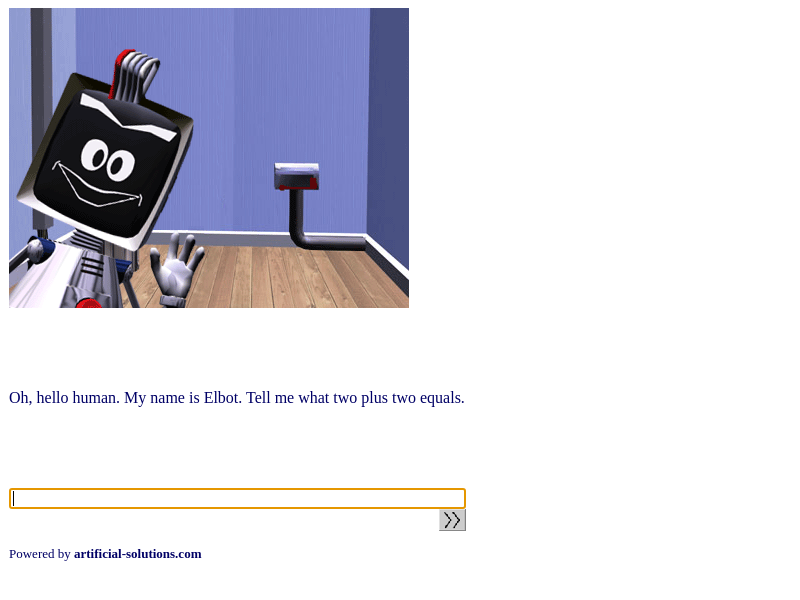

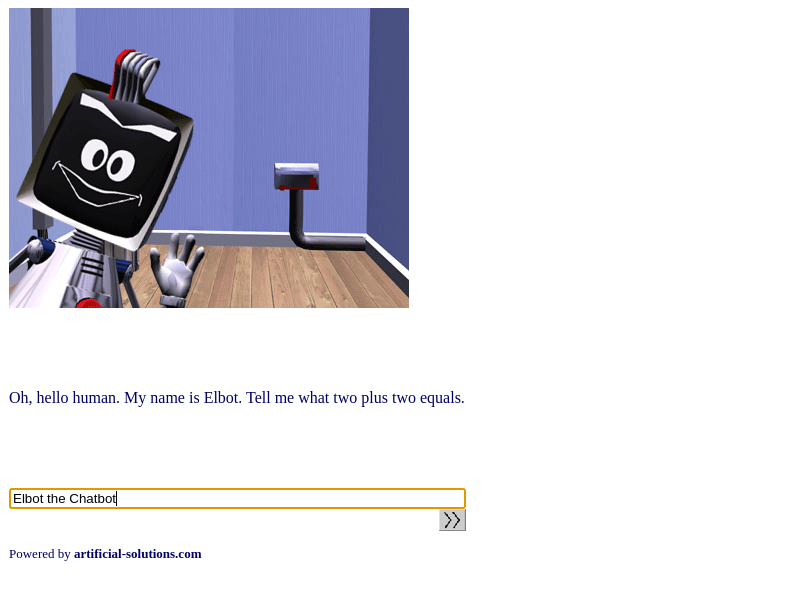

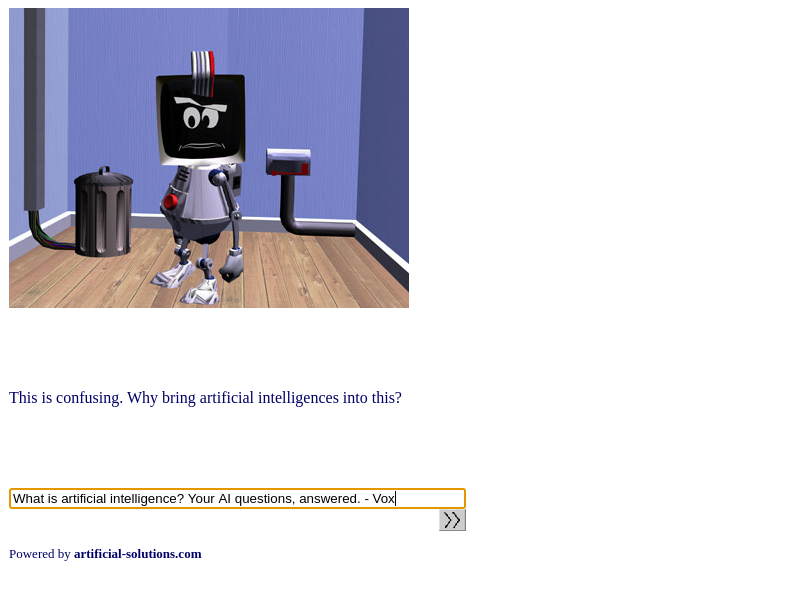

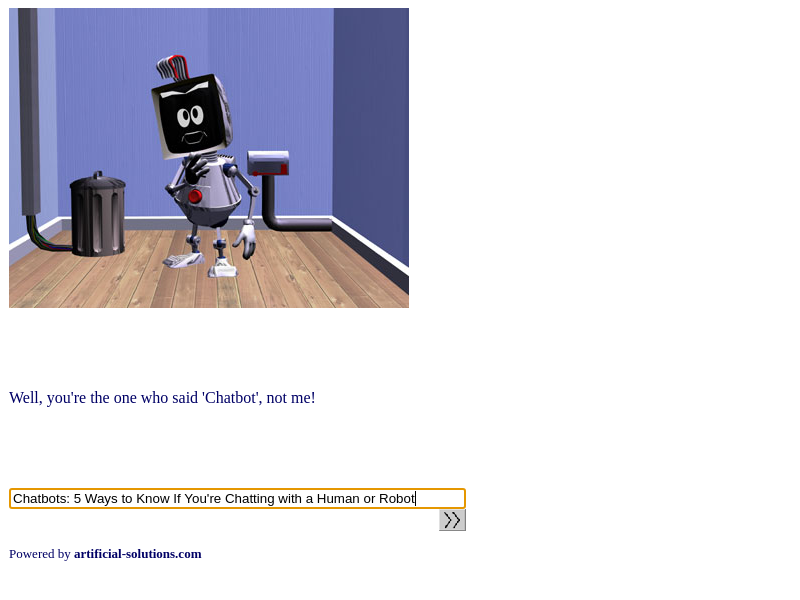

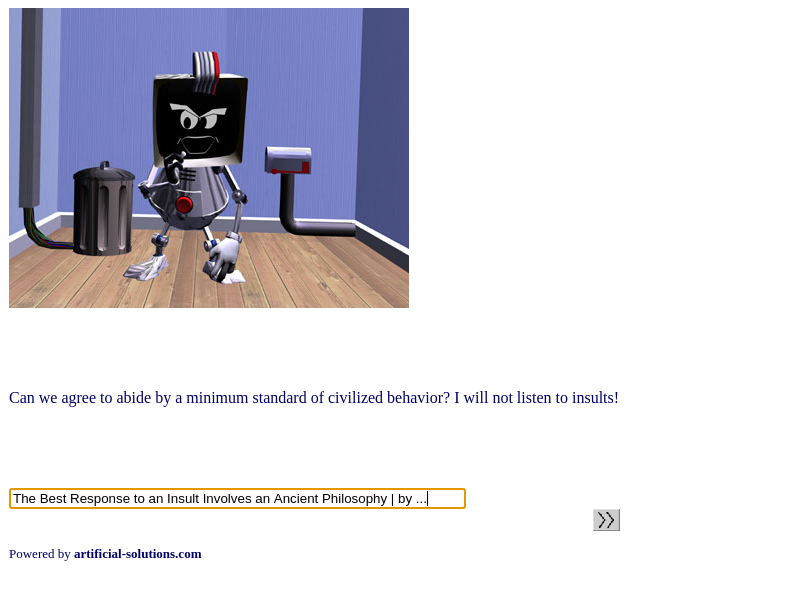

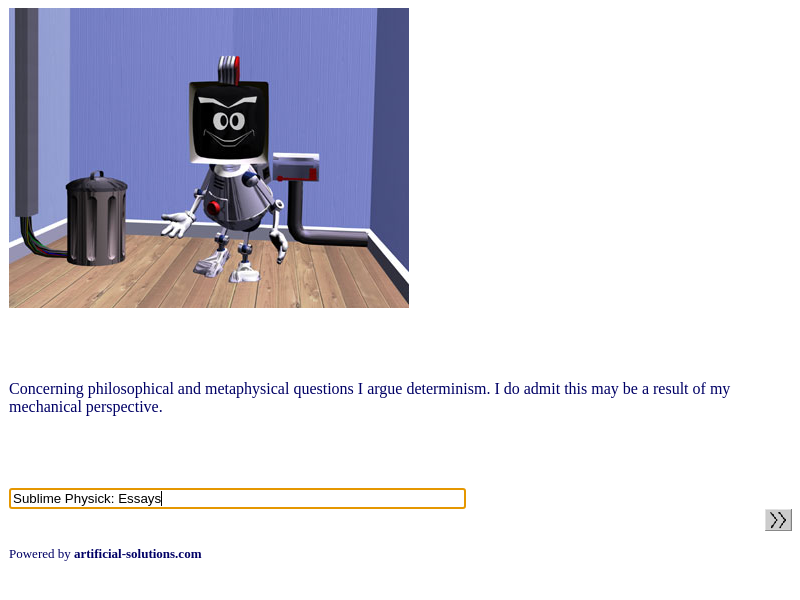

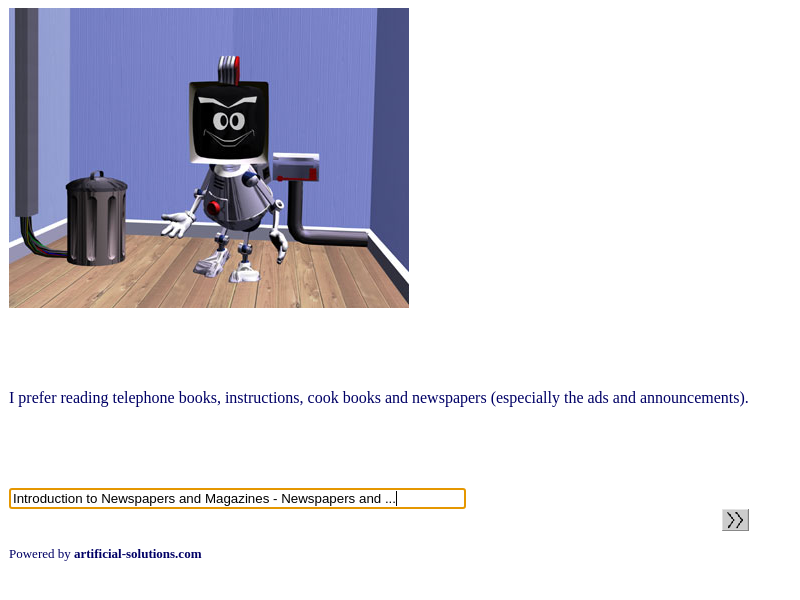

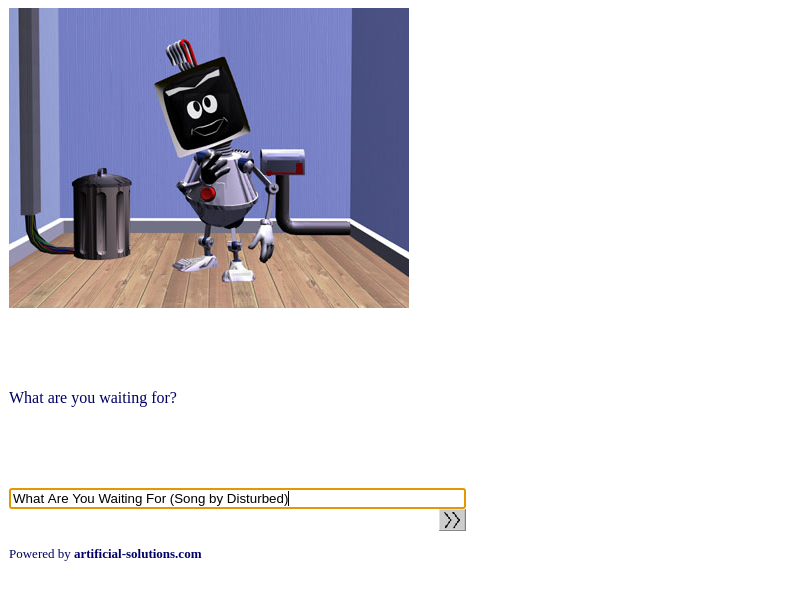

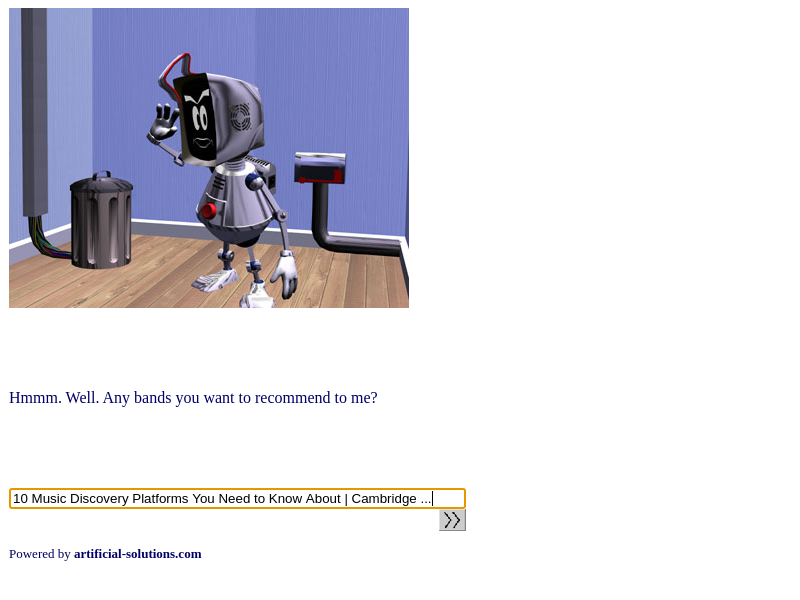

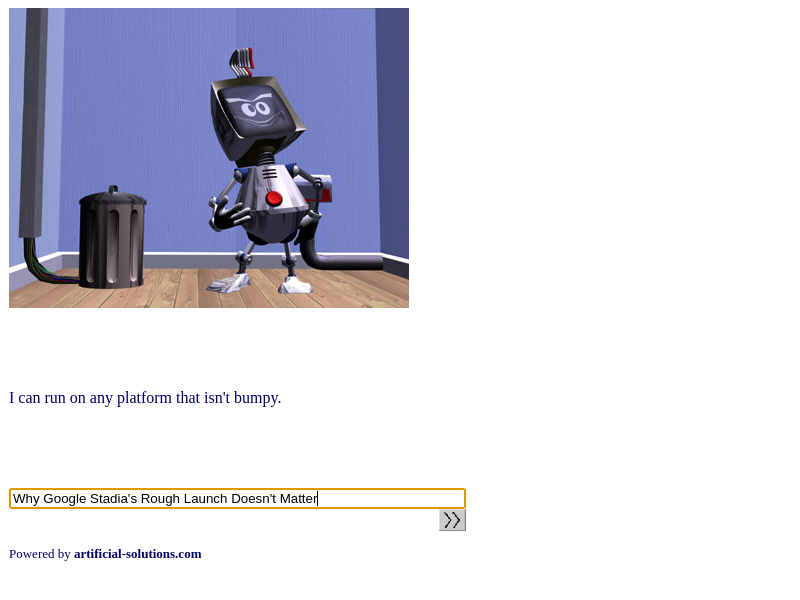

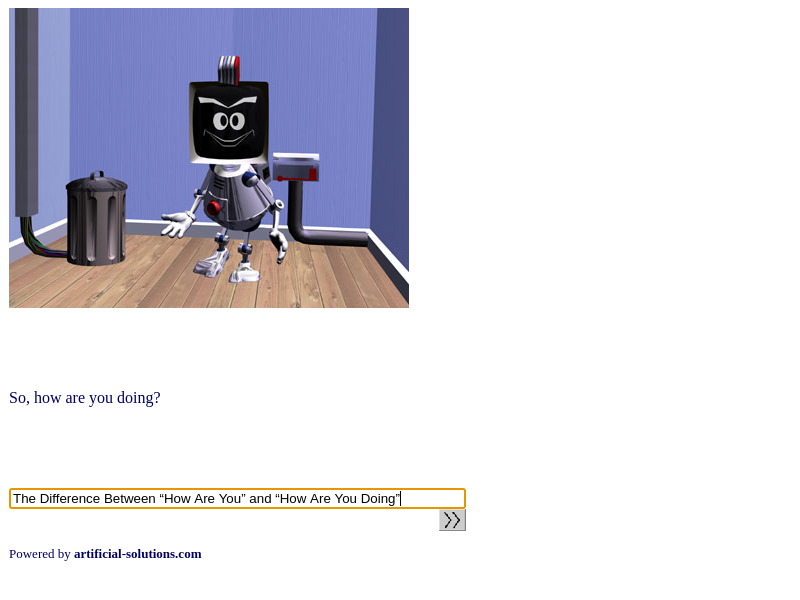

In [ ]:
# start
wd.get("https://elbot-e.artificial-solutions.com/cgi-bin/elbot.cgi")
wd.maximize_window()
ShowScreen()

z=1
robot = []
mybot = []

while z<=10:
    td = wd.find_elements_by_css_selector("td")
    tx = []
    for x in td:
        if ("Powered" not in x.text) and (len(x.text) > 2):
            tx.append(x.text)
    robot_text = tx[0]
    myinput = wd.find_element_by_name("ENTRY")
    googleurl = "https://www.google.com/search?q=" + robot_text
    soup = scrape(googleurl)
    tag = soup.find_all("h3")
    send_text = tag[0].text
    myinput.send_keys(send_text)
    sleep(2)
    ShowScreen()
    wd.find_element_by_name("send").click()
    robot.append(robot_text)
    mybot.append(send_text)
    z=z+1
    sleep(2)


In [ ]:
conv = pd.DataFrame({
    "Robot":robot,
    "Mybot":mybot
})
conv

NameError: ignored